# Object Detection

- Goals
 - Understand variety of object detection methods

#### Class 1 - Template Matching

- Template matching is the simplest form of object detection
- it simply scans a larger image for a provided template by sliding the template target image across the larger image
- The main option that can be adjusted is the comparison method used as the target template is slid across the larger image
- The methods are all some sort of correlation based metric

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

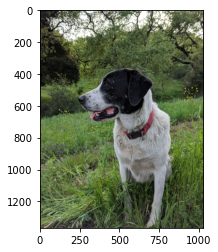

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

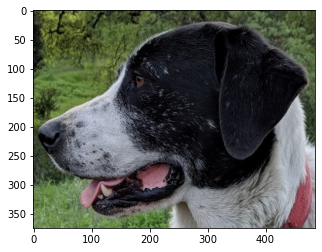

In [5]:
plt.imshow(face)

In [6]:
print('full shape: ',full.shape)
print('face shape: ',face.shape)

full shape:  (1367, 1025, 3)
face shape:  (375, 486, 3)


In [7]:
#comparison methods in string
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

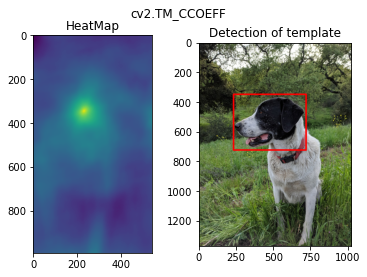

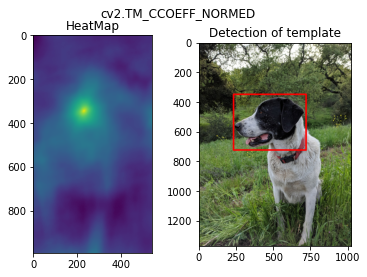

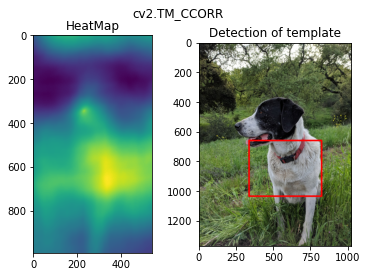

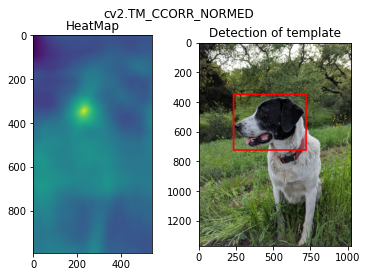

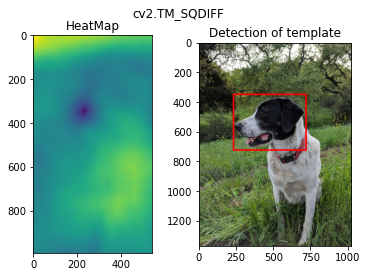

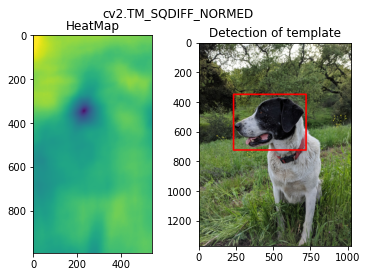

In [8]:
for m in methods:
    #create a copy of the full image
    full_copy = full.copy()
    
    method = eval(m)
    
    #template matching
    res = cv2.matchTemplate(full_copy,face,method)
    #match template output will be a heat map max value at matching places
    #its a reverse process in SQDIFF methods
    
    #take min and max values from res
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #check for methods and fix the top left corner to draw rectangle
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    #fixing bottom right corner of rectangle
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    #draw rectangle
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot 
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HeatMap')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')

### Class 2 - Corner Detection

- What is Corner?
 - A corner is a point whose local neighbourhood stands in two dominant and different edge directions
 - In other words, corner is a junction of two edges, where an edge is a sudden change in image brightness.
- Corner Detection Algorithms:
 - Harris Corner Detection
 - Shi-Thomas Corner Detection
- Harris Corner Detection:
 - Published in 1988 by Chris Harris and Mike Stephens
 - The basic intuition is that corners can be detected by looking for significant chnage in all directions.
 - Shifting a window/pane in any direction would result in a large change in appearance when window is over a corner portion.
 - Flat regions will have no change in all directions
 - Edges wont have a major change along the direction of the edge
- Shi-Thomas Corner Detection
 - Published in 1994 by J.Shi and C.Thomasi in their paper Good Features to Track.
 - Made a small modification to the Harris Corner Detector.
 - It changes the scoring function selection criteria that Harris uses.
  - Harris: R = lambda1 * lambda2 - k(lambda1 + lambda2)
  - Shit-Thomas : R = min(lambda1,lambda2)
  

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
flat_chess = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

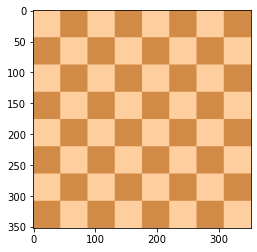

In [11]:
plt.imshow(flat_chess)

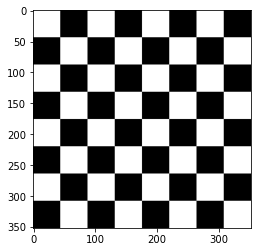

In [12]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess,cmap = 'gray')

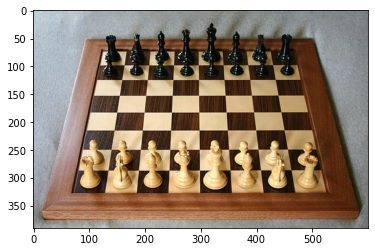

In [13]:
real_chess = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

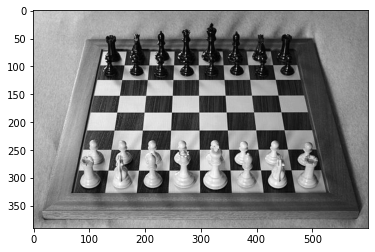

In [14]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess,cmap = 'gray')

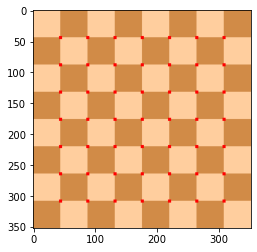

In [15]:
# detecting corners in flat chess board

# convert the image values to float32
gray = np.float32(gray_flat_chess)

#applying Harris Corner detection
dst = cv2.cornerHarris(gray,blockSize = 2,
                      ksize = 3,k = 0.04)

#dilate the destination image
dst = cv2.dilate(dst,None)

# In flat_chess image, if dst>1% of its maximum (dst.max()) 
# change the color for visualization

flat_chess[dst>0.01*dst.max()] = [255,0,0] #RGB channel

plt.imshow(flat_chess)

The outer corner are not detected because it is treated as flat regions

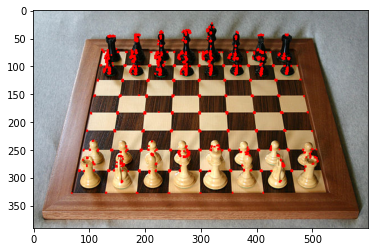

In [16]:
 # detecting corners in real chess board

# convert the image values to float32
gray = np.float32(gray_real_chess)

#applying Harris Corner detection
dst = cv2.cornerHarris(src= gray,blockSize = 2,ksize = 3,k=0.04)

#dilate the destination image
dst = cv2.dilate(dst,None)

# In flat_chess image, if dst>1% of its maximum (dst.max()) 
# change the color for visualization

real_chess[dst>0.01*dst.max()] = [255,0,0] #RGB channel

plt.imshow(real_chess)

#### Class 3 - Shi Thomas Corner Detection

In [17]:
flat_chess = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

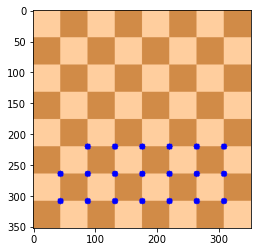

In [18]:
#detecting corners
corners = cv2.goodFeaturesToTrack(gray_flat_chess,20,0.01,10)

#convert to int
corners = np.int0(corners)

#draw circle
for i in corners:
    (x,y) = i.ravel()
    cv2.circle(flat_chess,(x,y),5,(0,0,255),-1)
    
plt.imshow(flat_chess)

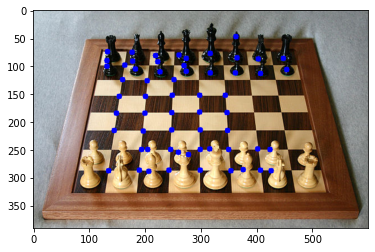

In [19]:
#detecting corners
corners = cv2.goodFeaturesToTrack(gray_real_chess,60,0.01,10)

#convert to int
corners = np.int0(corners)

#draw circle
for i in corners:
    (x,y) = i.ravel()
    cv2.circle(real_chess,(x,y),5,(0,0,255),-1)
    
plt.imshow(real_chess)

#### Class 4 - Edge Detection

- Canny Edge Detector:
 - developed in 1986 by John Canny and is a multi-stage algorithm
 - Steps:
  - Apply Gaussian filter to smooth the image in order to remove the noise
  - Find the intensity gradients of the image
  -  Apply non-maximum suprression to get rid of spurious response to edge detection
  - Apply double threshold to determine potential edges
  - Track edge by hysteresis: Finalize the detection of edges that are weak and not connected to strong edges.
 - A canny algorithm also requires a user to decide on low and high threshold values

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

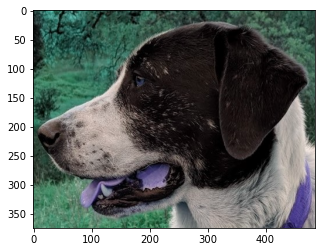

In [21]:
img = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/sammy_face.jpg')
plt.imshow(img)

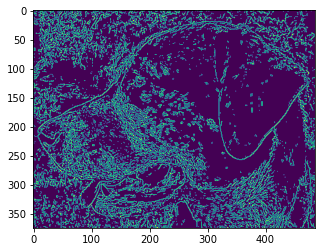

In [22]:
edges = cv2.Canny(img,127,127)
plt.imshow(edges)

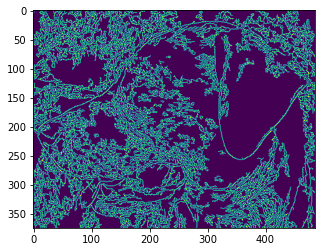

In [23]:
edges = cv2.Canny(img,255,0)
plt.imshow(edges)

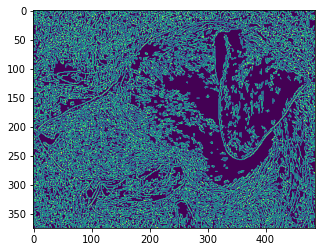

In [24]:
med = np.median(img)

#lower threshold will be either zero or 70% of the median, whichever is greater
lower = int(max(0,0.7*med))

#upper threshold will be either 255 or 30%more (1.3) of the median, whichever is lower
upper = int(min(255,1.3 * med))

edges = cv2.Canny(img,lower,upper)
plt.imshow(edges)

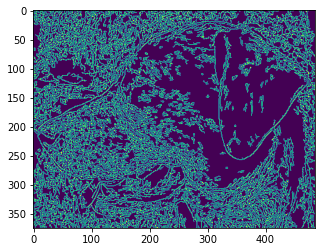

In [25]:
edges = cv2.Canny(img,lower,upper+75)
plt.imshow(edges)

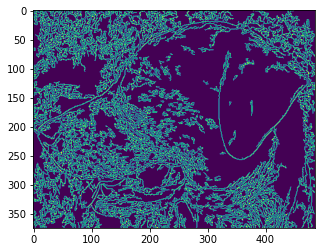

In [26]:
edges = cv2.Canny(img,lower,upper+150)
plt.imshow(edges)

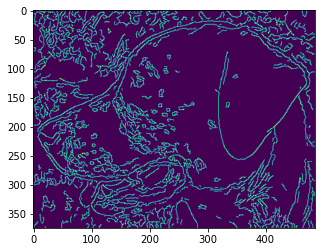

In [27]:
#blurring techniques

blurred_img = cv2.blur(img,(5,5))

edges = cv2.Canny(blurred_img,lower,upper)
plt.imshow(edges)

- you can observe better edge detections after blurring

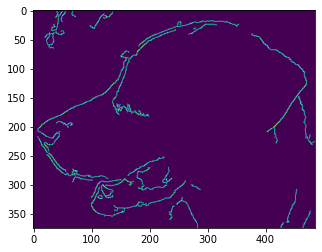

In [28]:
edges = cv2.Canny(blurred_img,lower,upper+130)
plt.imshow(edges)

#### Class 5 - Grid Detection

- Often cameras can create a distortion in an image, such as radial distortion and tangential distortion
- A good way to account for these dstortions when perfoemning operations like object tracking is to have a recognizable pattern attached to the object being tracked.

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

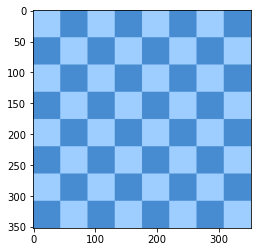

In [30]:
flat_chess = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/flat_chessboard.png')
plt.imshow(flat_chess)

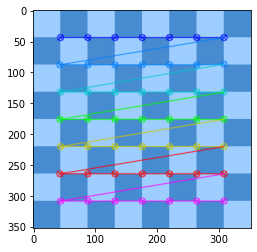

In [31]:
# find chess board corners and draw on them
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))

# draw corners
plt.imshow(cv2.drawChessboardCorners(flat_chess,(7,7),corners,found))

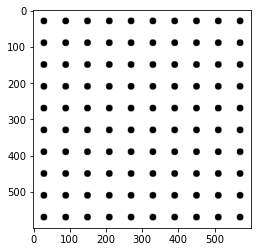

In [32]:
dot_grid = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/dot_grid.png')
plt.imshow(dot_grid)

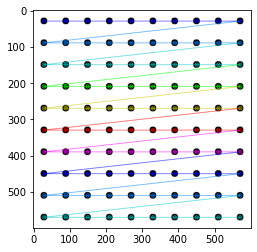

In [33]:
# finding dots in above image
found,corners = cv2.findCirclesGrid(dot_grid,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

#draw
plt.imshow(cv2.drawChessboardCorners(dot_grid,(10,10),corners,found))

#### Class 7 - Feature Matching (Part 1)

- extracts defining key features from an input image(using corner,edge and contour ideas)
- Then using a distance calculation, finds all the matches in a secondary image
- Three different Methods:
 - Brute-Force matching with ORB Desciptors
 - Brute-Force matching with SIFT descriptors and ratio test
 - FLANN based matcher

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [35]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

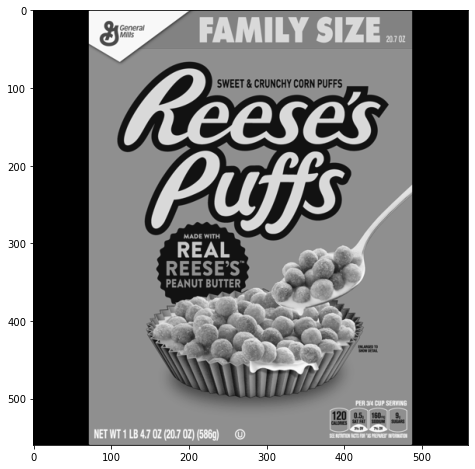

In [36]:
reeses = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/reeses_puffs.png',0)
display(reeses)

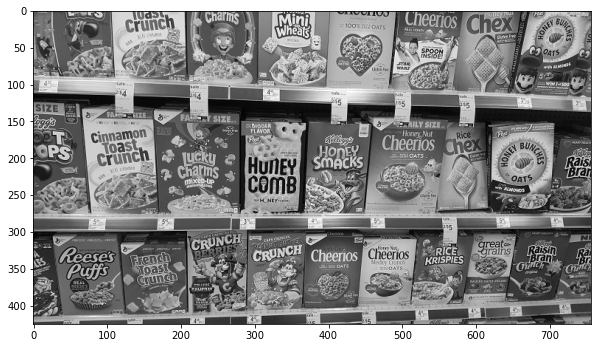

In [37]:
cereals = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/many_cereals.jpg',0)
display(cereals)

In [38]:
#brute force with orb
orb = cv2.ORB_create()

In [39]:
#detect and compute key points
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [40]:
#matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [41]:
matches = bf.match(des1,des2)

In [42]:
#sort them as per the match distance
matches = sorted(matches,key = lambda x:x.distance)

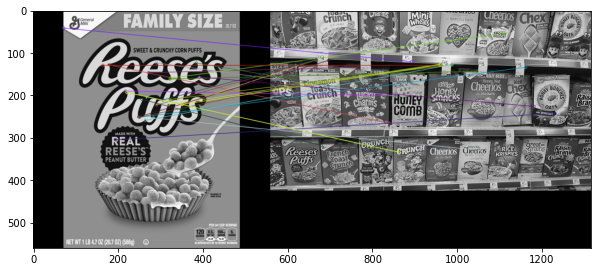

In [43]:
reeses_match = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],
                              None,flags = 2)
display(reeses_match)

- You can observe BF ORB is not good in matching for this case

#### Class 10 - Face detection

- Viola-Jones Face Detection
- This is face detection not face recognition
- In 2001 Paul Viola and Michale Jones came up with the idea of precomputing an integral image to save time on claculations
- Main Feature types:
 - Edge features
 - Line Features
 - Four rectangle features

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [45]:
nadia = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/solvay_conference.jpg',0)

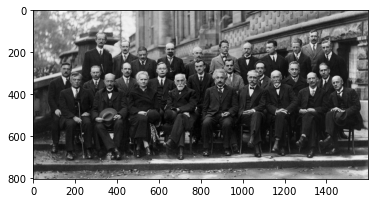

In [46]:
plt.imshow(solvay,cmap='gray')

In [47]:
face_cascade = cv2.CascadeClassifier('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [48]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return face_img

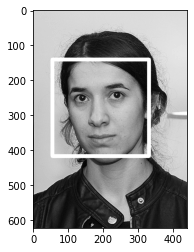

In [49]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

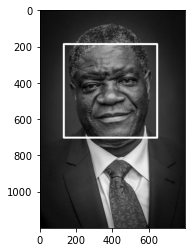

In [50]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

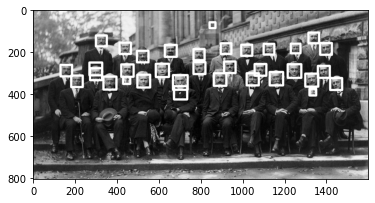

In [51]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [52]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,
                                               scaleFactor = 1.2,
                                              minNeighbors = 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return face_img

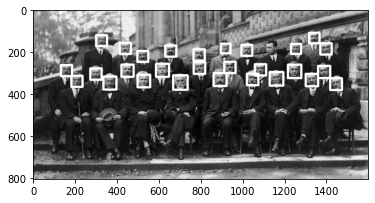

In [53]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [54]:
eye_cascade = cv2.CascadeClassifier('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/DATA/haarcascades/haarcascade_eye.xml')

In [55]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return face_img

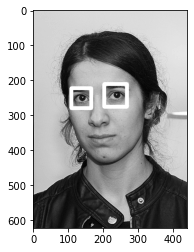

In [56]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

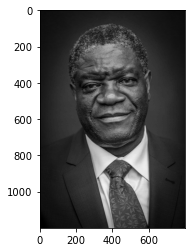

In [57]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [58]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video',frame)
    
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
        
cap.release
cv2.destroyAllWindows()

# # Object Detection Assessment Project Exercise

### Russian License Plate Blurring

#### Welcome to your object detection project! Your goal will be to use Haar Cascades to blur license plates detected in an image!

#### Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

#### OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files (unfortunately, it does not come with license detectors for other countries!)


In [59]:
# #### 3 Ways to Approach this project:
# * Just go for it! Use the image under the DATA folder called car_plate.jpg and create a function that will blur the image of its license plate. Check out the Haar Cascades folder for the correct pre-trained .xml file to use.
# * Use this notebook! Here we offer a guide of what main steps you should take to complete the project.
# * Jump to the solutions notebook and video to treat this entire project as code-along project where you can code along with us.

In [60]:
# ## Project Guide

# Follow and complete the tasks below to finish the project!

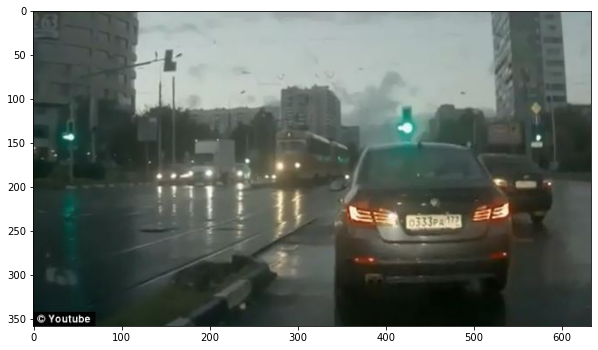

In [61]:
# TASK: Import the usual libraries you think you'll need.**

import cv2
import numpy as np
import matplotlib.pyplot as plt

# TASK: Read in the car_plate.jpg file from the DATA folder.**

car_img = cv2.imread('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/Data/car_plate.jpg')
car_img = cv2.cvtColor(car_img,cv2.COLOR_BGR2RGB)

# TASK: Create a function that displays the image in a larger scale and correct coloring for matplotlib.**

def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img)

display(car_img)

In [62]:
# TASK: Load the haarcascade_russian_plate_number.xml file.**

cascade = cv2.CascadeClassifier('C:/Users/vasukisriram/Downloads/Python OpenCV DL # DATA GH/Data/haarcascades/haarcascade_russian_plate_number.xml')

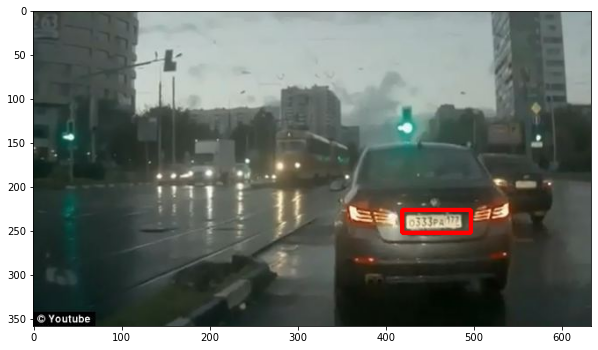

In [63]:
# TASK: Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur. You may want to play with the scaleFactor and minNeighbor numbers to get good results.**

def detect_plate(img):
    car_image_copy = img.copy()
    
    noplate_rect = cascade.detectMultiScale(car_image_copy,scaleFactor = 1.3,
                                           minNeighbors=2)
    
    for (x,y,w,h) in noplate_rect:
        cv2.rectangle(car_image_copy,(x,y),(x+w,y+h),(255,0,0),3)
    return car_image_copy

result = detect_plate(car_img)

display(result)

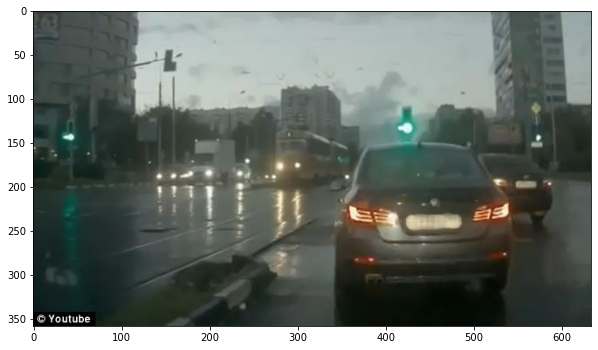

In [64]:
# FINAL TASK: Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**

# 1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI (somethign we covered in the lecture 01-Blending-and-Pasting-Images. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
# 2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
# 3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

def detect_and_blur_plate(img):
    
    plate = img.copy()
    roi = img.copy()
    
    noplate_rect = cascade.detectMultiScale(plate,scaleFactor = 1.3,
                                           minNeighbors=2)
    
    for (x,y,w,h) in noplate_rect:
        
        roi = roi[y:y+h,x:x+w]
        roi_blurred = cv2.medianBlur(roi,9)
        
        plate[y:y+h,x:x+w] = roi_blurred
    
    return plate
    

result = detect_and_blur_plate(car_img)

display(result)

# Great Job!